In [1]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

Cargar los datos en un dataframe llamado: airbnb

In [2]:
airbnb<-read.csv('data//airbnb.csv',sep = ',', stringsAsFactors = T)

Mostrar las primeras 6 filas del dataframe

In [3]:
airbnb[c(1:6),]

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [4]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")


names(airbnb)<-newnames


Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [5]:
airbnb$MetrosCuadrados<-c(airbnb$PiesCuadrados*0.092903)

Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [6]:
airbnb[which(airbnb$CodigoPostal == '28'),'CodigoPostal'] <- NA
airbnb[which(airbnb$CodigoPostal == '-'),'CodigoPostal'] <- NA
airbnb[which(airbnb$CodigoPostal == ''),'CodigoPostal'] <- NA

airbnb[which(grepl("^2[0,1,2,3,4,5,6,7,9]",airbnb$CodigoPostal)),'CodigoPostal']<-NA

airbnb$CodigoPostal<-gsub("Madrid 28004","28004",airbnb$CodigoPostal)
airbnb$CodigoPostal<-gsub("^2815$","28015",airbnb$CodigoPostal)
airbnb$CodigoPostal<-gsub("^2804$","28004",airbnb$CodigoPostal)
airbnb$CodigoPostal<-gsub("^2805$","28005",airbnb$CodigoPostal)
airbnb$CodigoPostal<-gsub("28051\n28051","28051",airbnb$CodigoPostal)
airbnb$CodigoPostal<-gsub("28002\n28002","28002",airbnb$CodigoPostal)

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [7]:
unique(na.omit(airbnb$CodigoPostal))

[1] "28004"  "28015"  "28013"  "28005"  "28012"  "28014"  "28045"  "28007" 
 [9] "28028"  "28009"  "28001"  "28006"  "28010"  "28002"  "28034"  "28050" 
[17] "28008"  "28011"  "28049"  "28038"  "28053"  "28047"  "28025"  "28019" 
[25] "28024"  "28016"  "28036"  "28046"  "28039"  "28020"  "28003"  "28029" 
[33] "28054"  "28041"  "28026"  "28058"  "28018"  "28030"  "28017"  "28027" 
[41] "28043"  "28033"  "28055"  "28021"  "28032"  "28037"  "28022"  "28042" 
[49] "28094"  "280013" "28035"  "28040"  "28031"  "28044"  "28105"  "28023" 
[57] "28051"  "28850"  "28048"  "28056"  "28060"  "28052"

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [8]:
cpTop5<-table(na.omit(airbnb$CodigoPostal))
cpTop5<-sort(cpTop5,decreasing  = TRUE)
cpTop5[1:5] #con más entradas


28012 28004 28005 28013 28014 
 2060  1796  1195  1019   630 

In [9]:
cpTop5<-sort(cpTop5,decreasing  = FALSE)
cpTop5[1:5] #con menos entradas


280013  28048  28052  28056  28058 
     1      1      1      1      1 

¿Cuales son los barrios que hay en el código postal 28012?

In [10]:
temp1 <-subset(airbnb, CodigoPostal=='28012')
unique(temp1$Barrio)

[1] Sol             Acacias         Palos de Moguer Embajadores    
 [5] Cortes          Palacio         Universidad     Delicias       
 [9] Arapiles        Atocha          Goya           
125 Levels: Abrantes Acacias Adelfas Aeropuerto Aguilas ... Zofío

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [11]:
entradasBarrios<-data.frame(table(temp1$Barrio))
entradasBarrios <-subset(entradasBarrios, entradasBarrios$Freq > 0)
entradasBarrios

,Var1,Freq
,<fct>,<int>
2,Acacias,13
14,Arapiles,1
18,Atocha,1
41,Cortes,216
45,Delicias,1
49,Embajadores,1449
56,Goya,1
81,Palacio,27
85,Palos de Moguer,46


¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [12]:
sum(table(na.omit(airbnb$Barrio))) #total barrios

[1] 13207

In [13]:
na.omit(unique(airbnb$Barrio))   #barrios existentes

[1] Universidad                  Sol                         
  [3] Imperial                     Acacias                     
  [5] Chopera                      Delicias                    
  [7] Palos de Moguer              Embajadores                 
  [9] Cortes                       Atocha                      
 [11] Pacífico                     Adelfas                     
 [13] Estrella                     Ibiza                       
 [15] Jerónimos                    Niño Jesús                  
 [17] Palacio                      Justicia                    
 [19] Recoletos                    Goya                        
 [21] Fuente del Berro             Arapiles                    
 [23] Trafalgar                    Almagro                     
 [25] Guindalera                   Lista                       
 [27] Castellana                   El Viso                     
 [29] Prosperidad                  Valverde                    
 [31] Casa de Campo                El Goloso                   
 [33] Numancia                     Cármenes                    
 [35] Puerta del Angel             Lucero                      
 [37] Aluche                       San Isidro                  
 [39] Campamento                   Comillas                    
 [41] Opañel                       Vista Alegre                
 [43] Ciudad Jardín                Hispanoamérica              
 [45] Nueva España                 Castilla                    
 [47] Bellas Vistas                Cuatro Caminos              
 [49] Castillejos                  Vallehermoso                
 [51] Almenara                     Valdeacederas               
 [53] Berruguete                   Gaztambide                  
 [55] Rios Rosas                   Peñagrande                  
 [57] Argüelles                    Puerta Bonita               
 [59] Buenavista                   Abrantes                    
 [61] Orcasur                      San Fermín                  
 [63] Almendrales                  Pradolongo                  
 [65] Portazgo                     Entrevías                   
 [67] San Diego                    Palomeras Bajas             
 [69] Fontarrón                    Vinateros                   
 [71] Ventas                       Pueblo Nuevo                
 [73] Quintana                     Concepción                  
 [75] San Juan Bautista            Costillares                 
 [77] Piovera                      Canillas                    
 [79] Pinar del Rey                Apostol Santiago            
 [81] San Andrés                   Valdefuentes                
 [83] Butarque                     Los Angeles                 
 [85] Casco Histórico de Vicálvaro Simancas                    
 [87] Rejas                        Salvador                    
 [89] Casco Histórico de Barajas   Pilar                       
 [91] La Paz                       Mirasierra                  
 [93] Ciudad Universitaria         Moscardó                    
 [95] Palomeras Sureste            Marroquina                  
 [97] Media Legua                  Los Rosales                 
 [99] Casco Histórico de Vallecas  Timón                       
[101] Corralejos                   Cuatro Vientos              
[103] Colina                       San Cristobal               
[105] Alameda de Osuna             Aeropuerto                  
[107] Palomas                      Zofío                       
[109] Aguilas                      Legazpi                     
[111] Fuentelareina                Aravaca                     
[113] Ambroz                       Canillejas                  
[115] Valdezarza                   Amposta                     
[117] San Pascual                  Santa Eugenia               
[119] Arcos                        Rosas                       
[121] Valdemarín                   El Plantío                  
[123] Hellín                       Pavones                     
[125] Orcasitas                   

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [14]:
barrioTop5<-table(airbnb$Barrio)
barrioTop5<-sort(barrioTop5,decreasing  = TRUE)
barrioTop5[1:5]


Embajadores Universidad     Palacio         Sol    Justicia 
       1844        1358        1083         940         785 

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [15]:
length(unique(airbnb$TipoAlquiler))

[1] 3

In [16]:
unique(airbnb$TipoAlquiler)  # tipos de alquiler

[1] Private room    Entire home/apt Shared room    
Levels: Entire home/apt Private room Shared room

In [17]:
table(airbnb$TipoAlquiler)   # nº entradas por tipo


Entire home/apt    Private room     Shared room 
           7903            5113             191 

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”


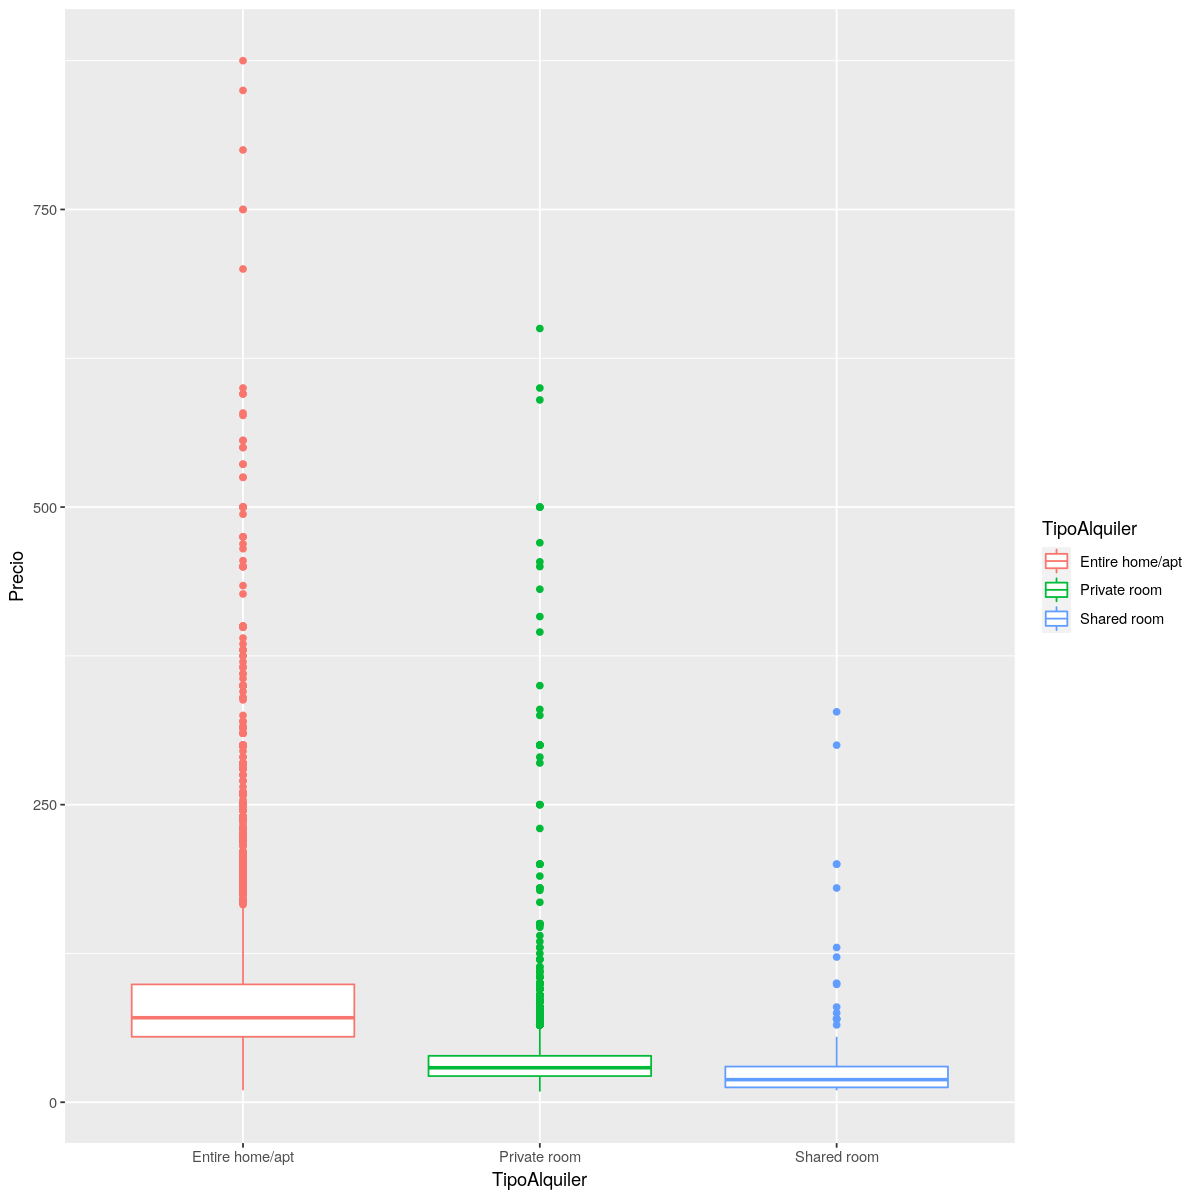

In [18]:
airbnb$Precio<- as.numeric(airbnb$Precio)
options(repr.plot.height=10,repr.plot.width=10)
ggplot(data=airbnb,aes(x=TipoAlquiler, y=Precio,color=TipoAlquiler))+geom_boxplot()

Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [19]:
medias<-aggregate(Precio~TipoAlquiler,airbnb,mean,na.rm=TRUE) 
medias #precio medio por alquiler

TipoAlquiler,Precio
<fct>,<dbl>
Entire home/apt,87.29661
Private room,34.25514
Shared room,29.85340


In [20]:
#Comprobar si es distribucion gaussiana
entireHome <- airbnb[airbnb$TipoAlquiler == "Entire home/apt",]
shapiro.test(entireHome$Precio[1:5000])  ##p-value es muy bajo,por lo que es una distribucion gaussiana


	Shapiro-Wilk normality test

data:  entireHome$Precio[1:5000]
W = 0.64959, p-value < 2.2e-16


In [21]:
privateRoom <- airbnb[airbnb$TipoAlquiler == "Private room",]
shapiro.test(privateRoom$Precio[1:5000])  ##p-value es muy bajo,por lo que es una distribucion gaussiana


	Shapiro-Wilk normality test

data:  privateRoom$Precio[1:5000]
W = 0.38267, p-value < 2.2e-16


In [22]:
sharedRoom <- airbnb[airbnb$TipoAlquiler == "Shared room",]
shapiro.test(sharedRoom$Precio[1:5000])  ##p-value es muy bajo,por lo que es una distribucion gaussiana


	Shapiro-Wilk normality test

data:  sharedRoom$Precio[1:5000]
W = 0.4436, p-value < 2.2e-16


In [23]:
#aplicamos test anova(por ser distribucion gaussiana)

summary(aov( Precio ~ TipoAlquiler, data=airbnb))     #La diferencia Si es estadísticamente significativa, porque el p.value < 0.5

                Df   Sum Sq Mean Sq F value Pr(>F)    
TipoAlquiler     2  8981217 4490608    1828 <2e-16 ***
Residuals    13195 32417217    2457                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
9 observations deleted due to missingness

Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [24]:
airbnb_entire<-subset(airbnb, TipoAlquiler =='Entire home/apt')

¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [25]:
barrioTop5entire<-table(airbnb_entire$Barrio)
barrioTop5entire<-sort(barrioTop5entire,decreasing  = TRUE)
names(barrioTop5entire[1:5])

[1] "Embajadores" "Universidad" "Palacio"     "Sol"         "Cortes"

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [26]:
airbnb_entire$Precio<- as.numeric(airbnb_entire$Precio)

In [27]:
temp<-aggregate(Precio~Barrio,airbnb_entire,mean,na.rm=TRUE) 
barrioTop5Precioentire<-temp[with(temp, order(-temp$Precio)), ] 
names(barrioTop5Precioentire)[2] = "PrecioMedio"
barrioTop5Precioentire[1:5,]

,Barrio,PrecioMedio
,<fct>,<dbl>
77,Palomas,309.7500
50,Fuentelareina,180.0000
93,Recoletos,161.9254
43,El Plantío,150.0000
30,Castellana,141.3889


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [28]:
barriosElegidos = barrioTop5Precioentire

a<-airbnb_entire[airbnb_entire$TipoPropiedad=="Apartment",] 
b<-data.frame(table(a$Barrio))
names(b)[1] = "Barrio"


union<-merge(b, barriosElegidos, by = "Barrio")
union<-union[with(union, order(-union$PrecioMedio)), ] 
union[1:5,]

,Barrio,Freq,PrecioMedio
,<fct>,<int>,<dbl>
77,Palomas,2,309.7500
50,Fuentelareina,1,180.0000
93,Recoletos,122,161.9254
43,El Plantío,0,150.0000
30,Castellana,66,141.3889


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [29]:
ordenados<-union[with(union, order(-union$PrecioMedio)), ] 
ordenados<-data.frame(ordenados)
ordenados<-ordenados[ordenados$Freq> 100,]
ordenados[1:5,]

,Barrio,Freq,PrecioMedio
,<fct>,<int>,<dbl>
93,Recoletos,122,161.92537
52,Goya,122,111.33803
106,Sol,648,100.75036
108,Trafalgar,203,98.57848
59,Justicia,486,98.25468


Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


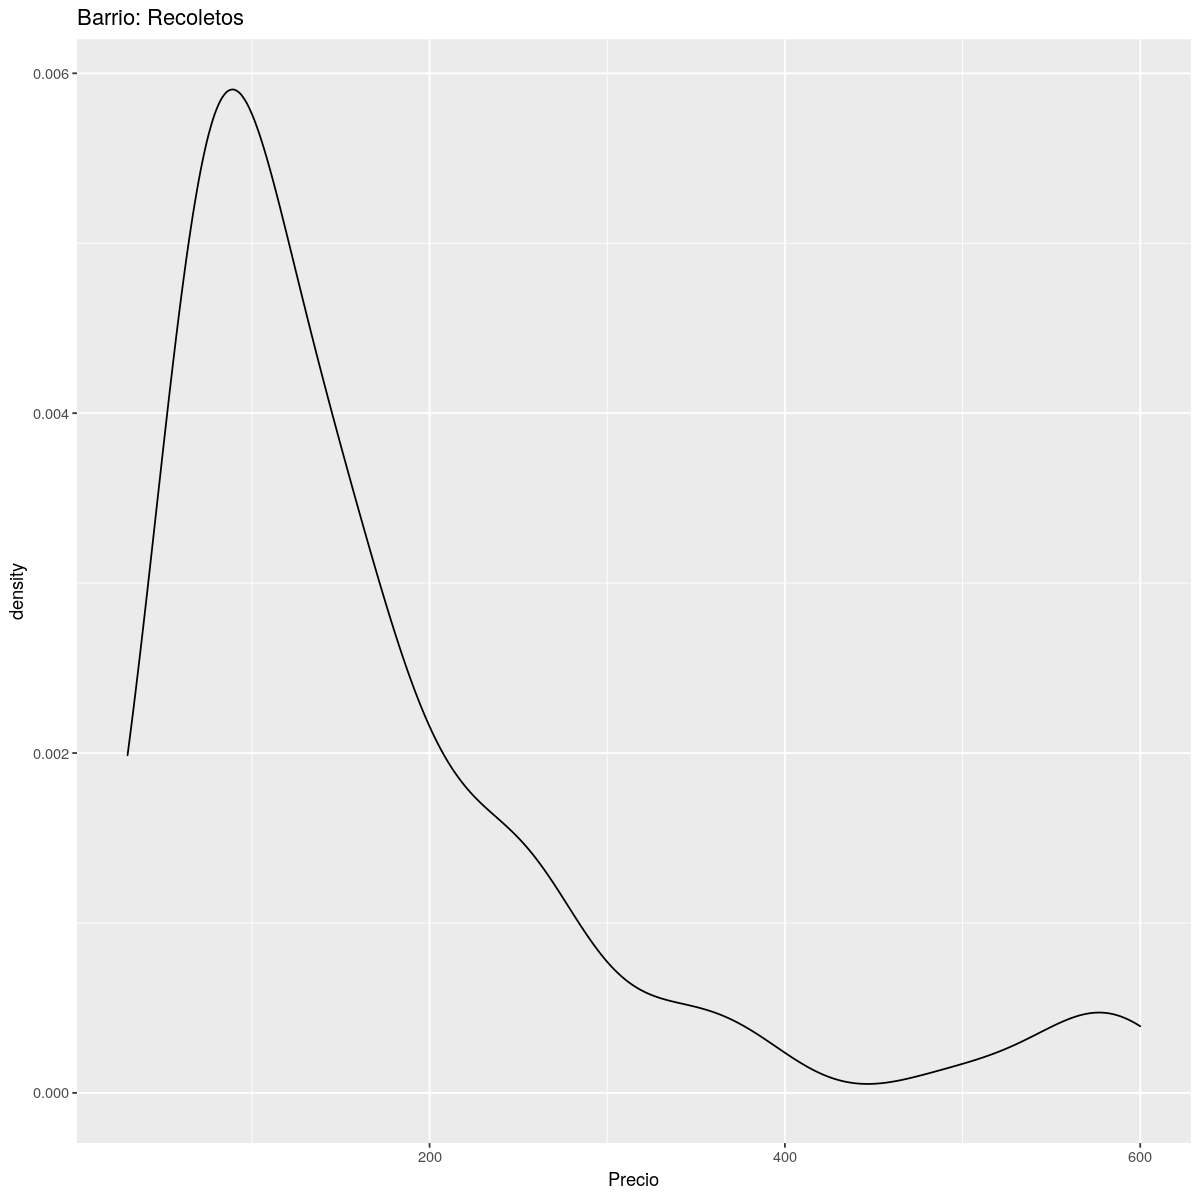

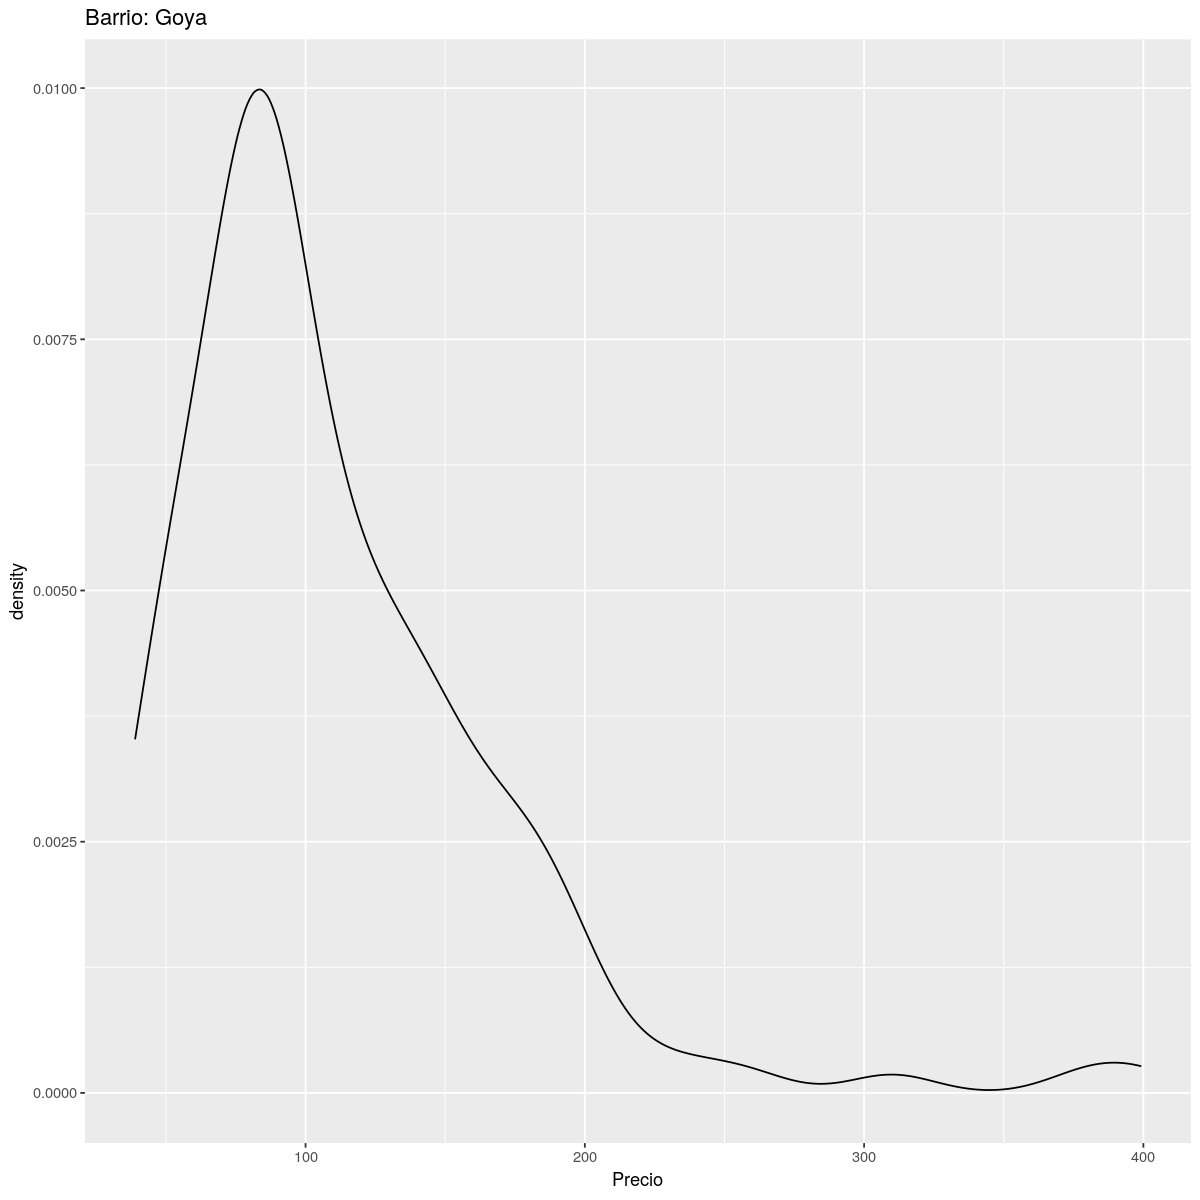

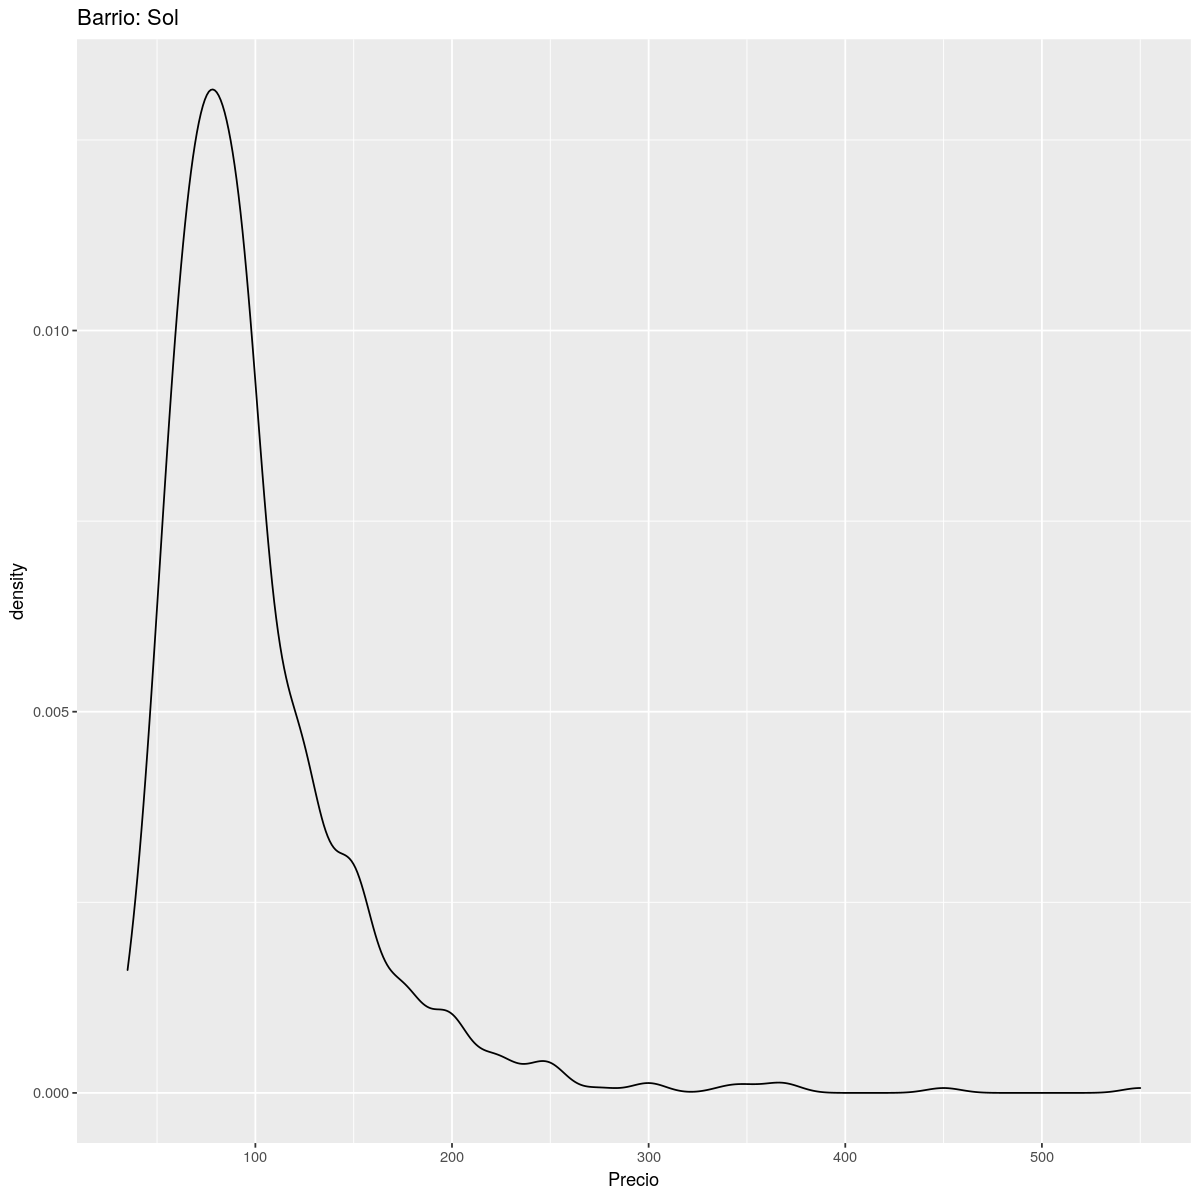

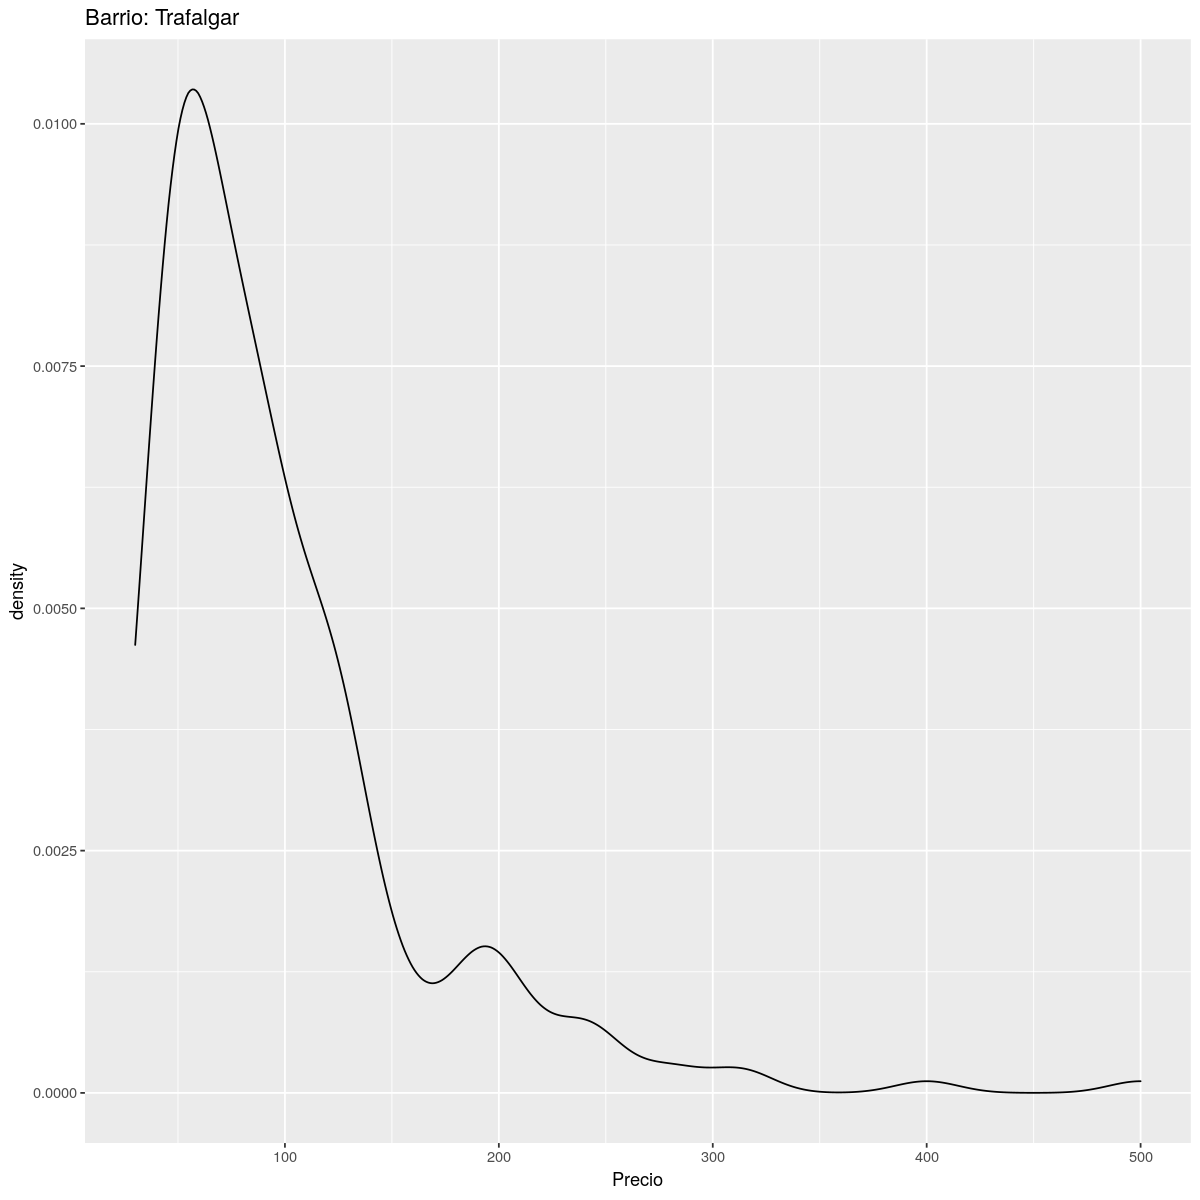

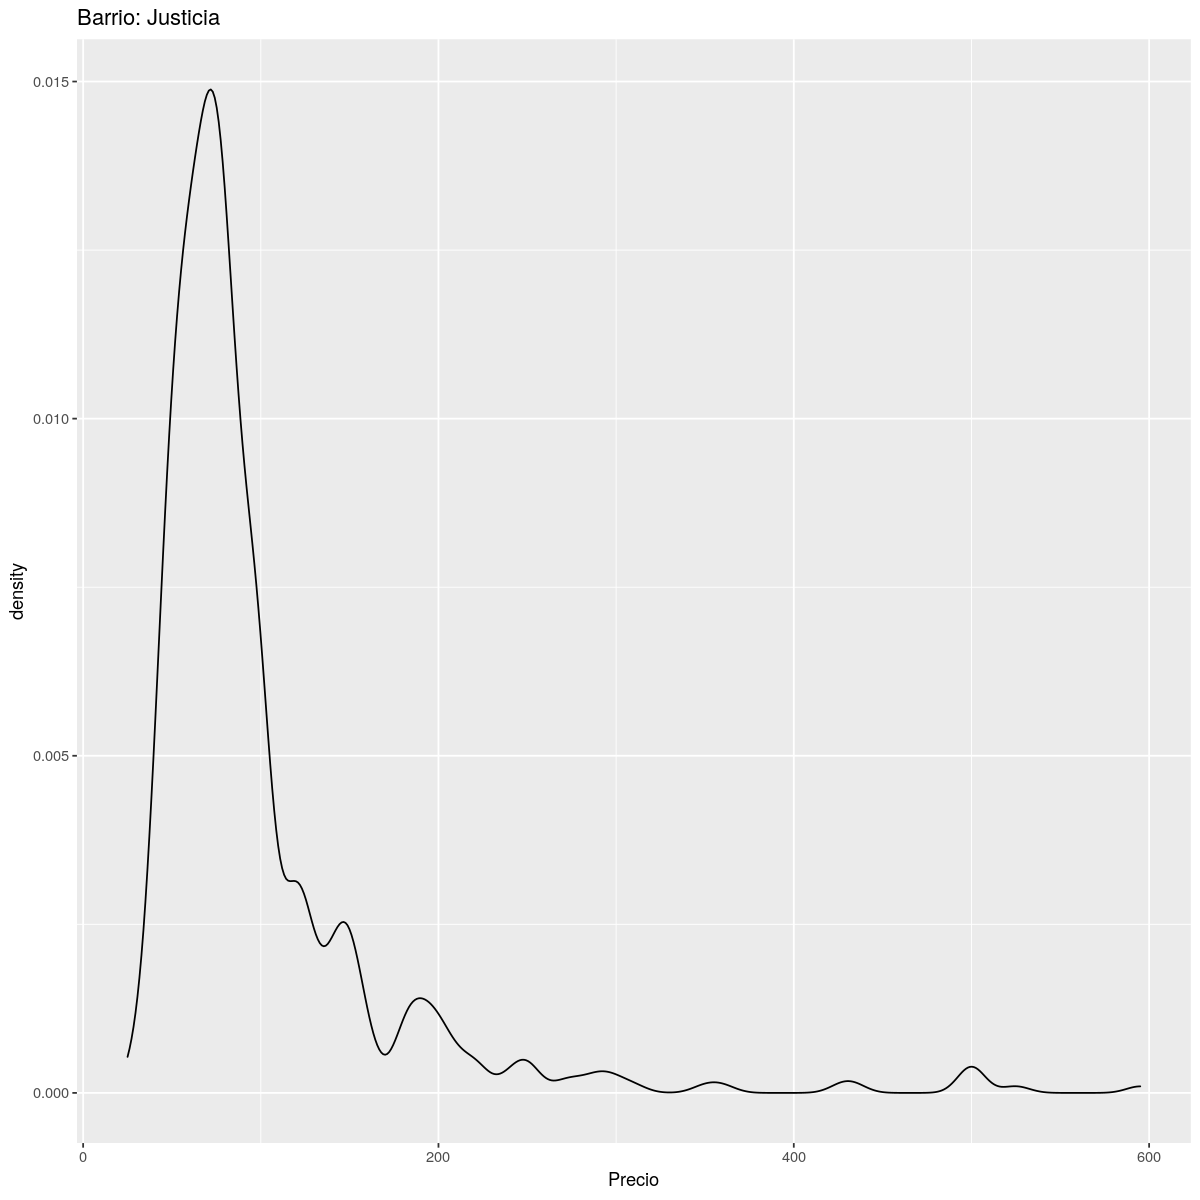

In [30]:
library(ggplot2)

g1<-airbnb_entire[airbnb_entire$Barrio == "Recoletos",]
ggplot(data=g1, aes(x=Precio))+geom_density() + ggtitle ("Barrio: Recoletos")

g2<-airbnb_entire[airbnb_entire$Barrio == "Goya",]
ggplot(data=g2, aes(x=Precio))+geom_density()+ ggtitle ("Barrio: Goya")

g3<-airbnb_entire[airbnb_entire$Barrio == "Sol",]
ggplot(data=g3, aes(x=Precio))+geom_density()+ ggtitle ("Barrio: Sol")

g4<-airbnb_entire[airbnb_entire$Barrio == "Trafalgar",]
ggplot(data=g4, aes(x=Precio))+geom_density()+ ggtitle ("Barrio: Trafalgar")

g5<-airbnb_entire[airbnb_entire$Barrio == "Justicia",]
ggplot(data=g5, aes(x=Precio))+geom_density()+ ggtitle ("Barrio: Justicia")




Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [31]:
airbnb_entire$MetrosCuadrados <- as.numeric(airbnb_entire$MetrosCuadrados)
metrosBarrios<-aggregate(MetrosCuadrados~Barrio,airbnb_entire,mean,na.rm=TRUE) 

union2 <-merge(metrosBarrios,ordenados[1:5,],  by = "Barrio")
union2

Barrio,MetrosCuadrados,Freq,PrecioMedio
<fct>,<dbl>,<int>,<dbl>
Goya,51.68504,122,111.33803
Justicia,28.52669,486,98.25468
Recoletos,26.66316,122,161.92537
Sol,45.61692,648,100.75036
Trafalgar,29.30426,203,98.57848


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

Warning message:
“Removed 132 rows containing non-finite values (stat_density).”
Warning message:
“Removed 139 rows containing non-finite values (stat_density).”


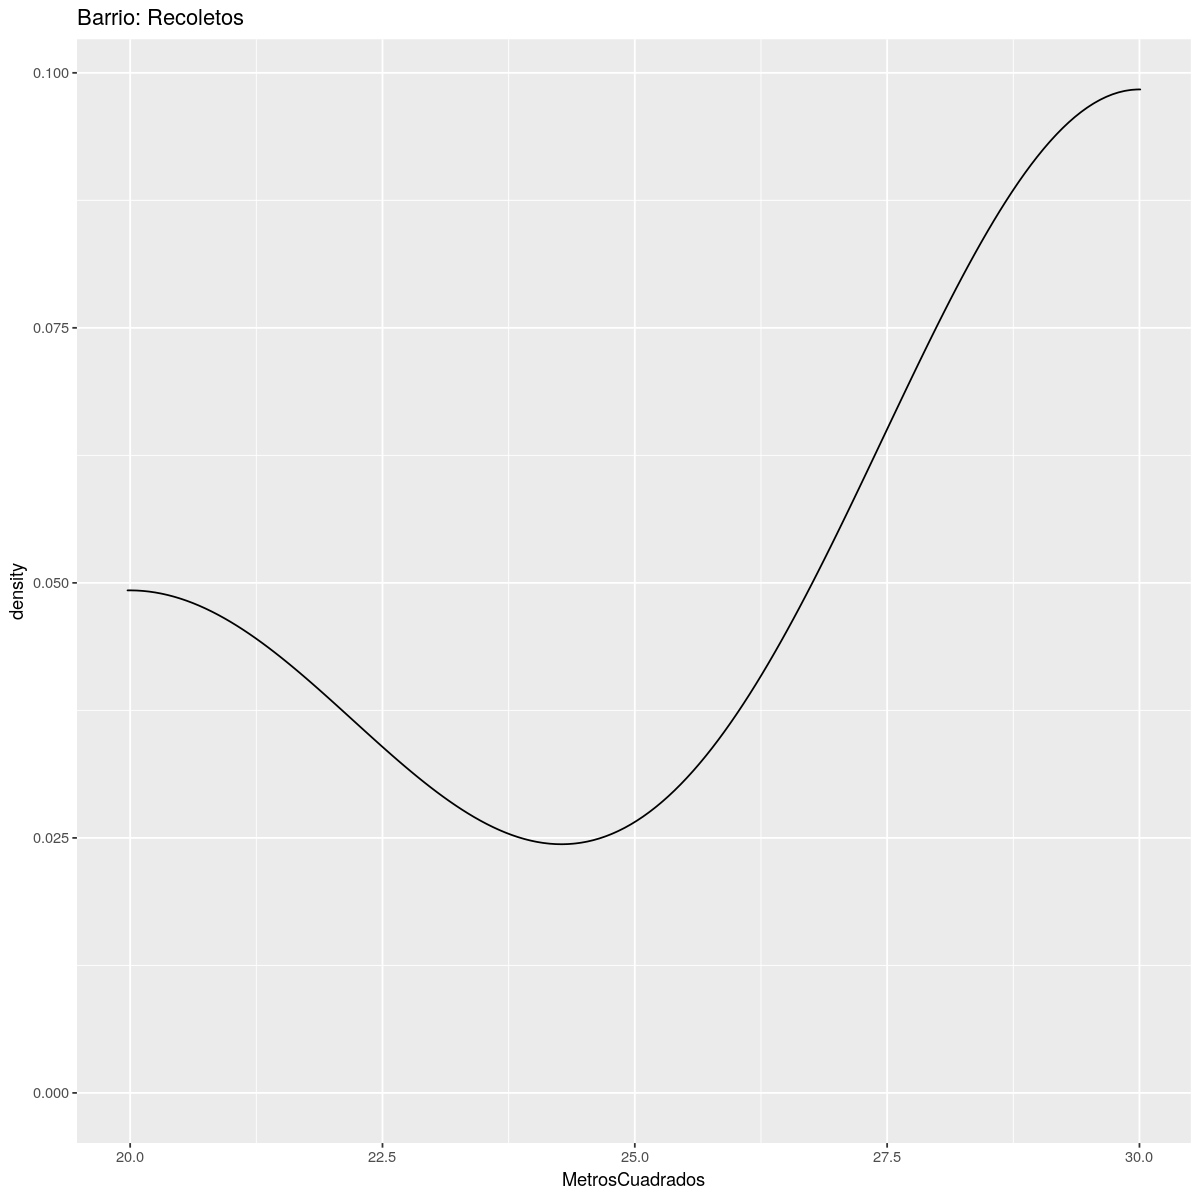

Warning message:
“Removed 641 rows containing non-finite values (stat_density).”


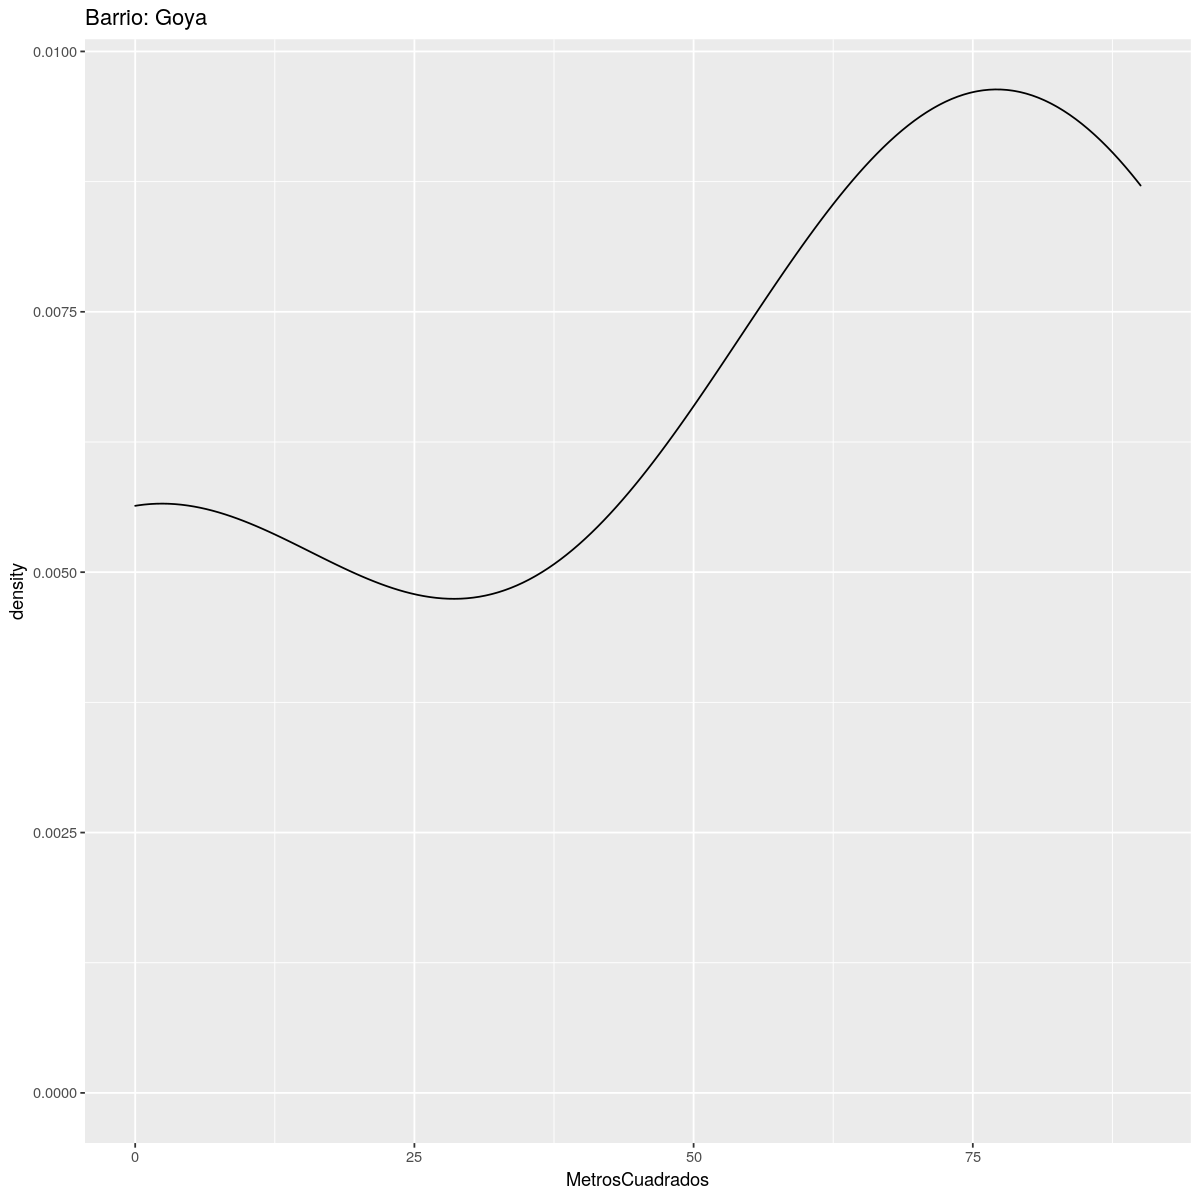

Warning message:
“Removed 216 rows containing non-finite values (stat_density).”


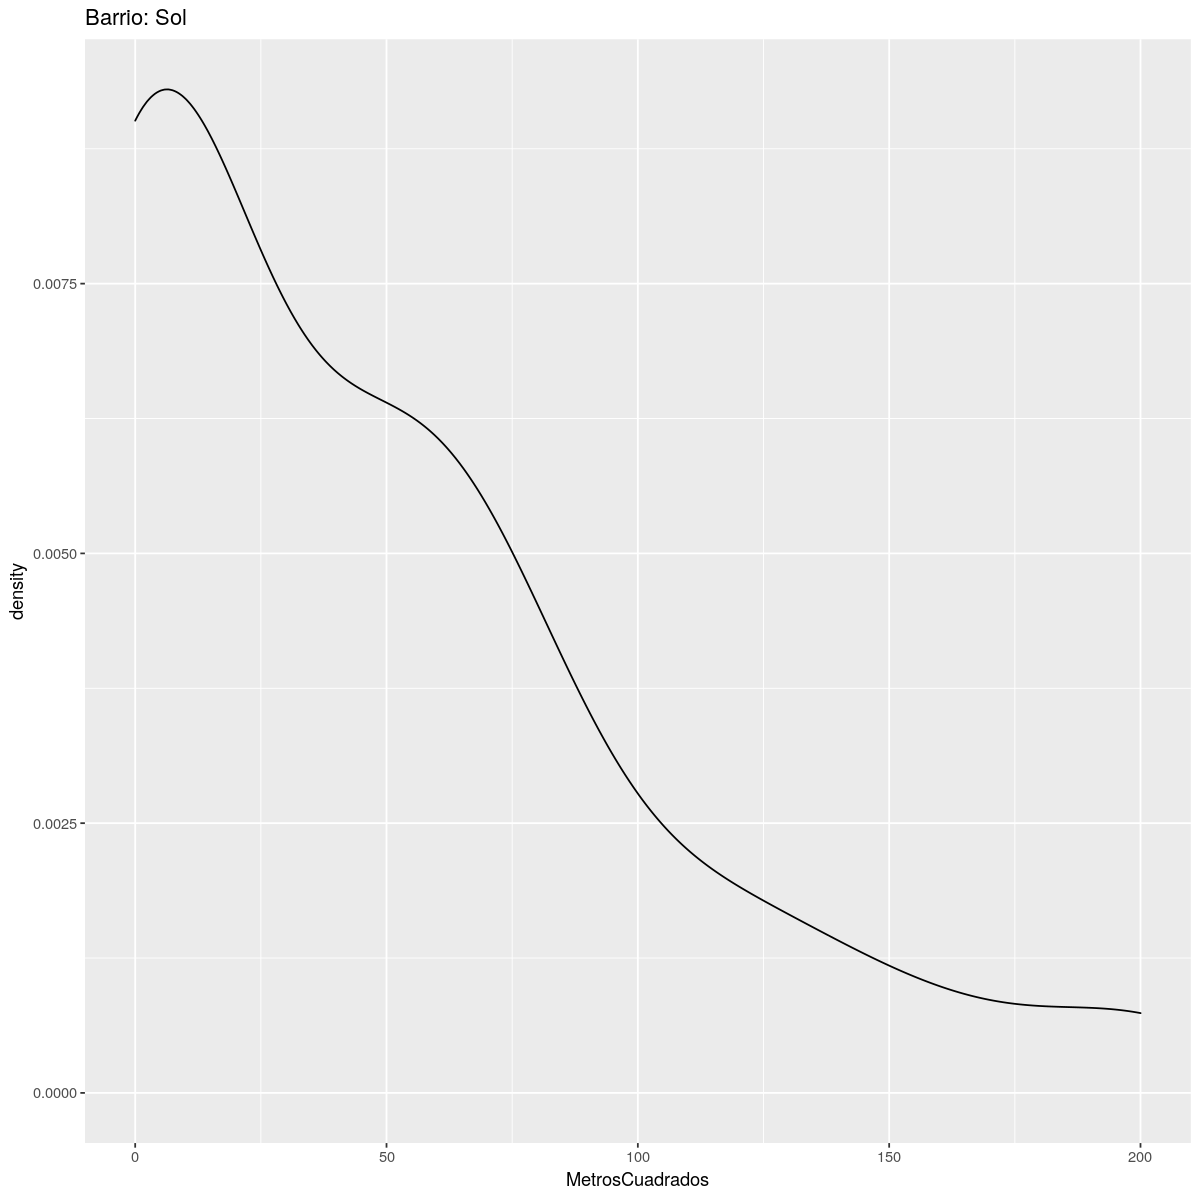

Warning message:
“Removed 517 rows containing non-finite values (stat_density).”


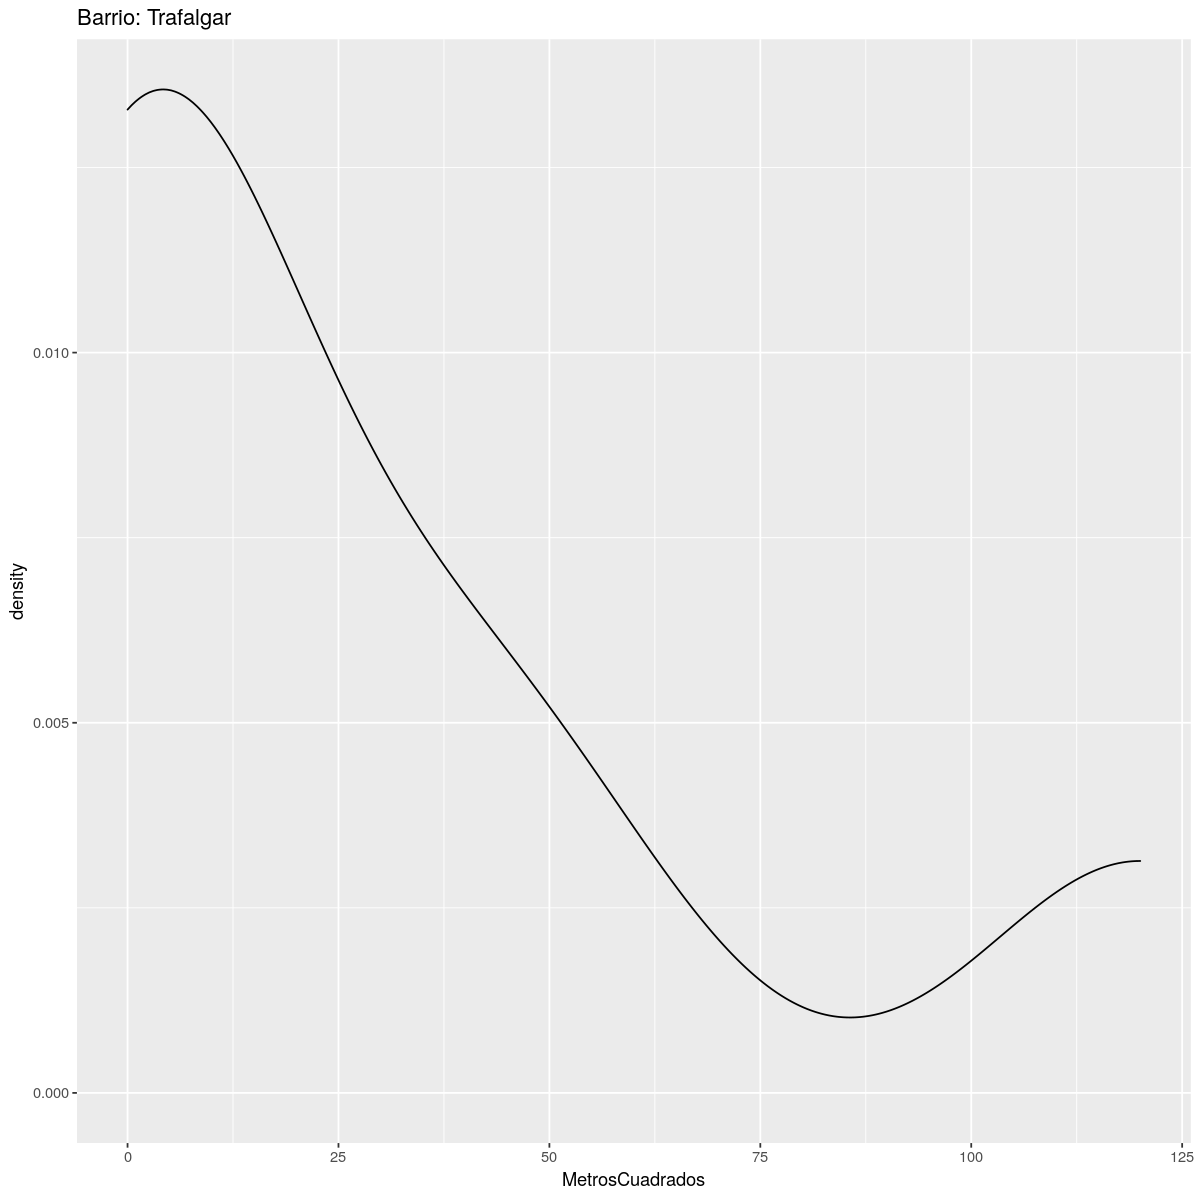

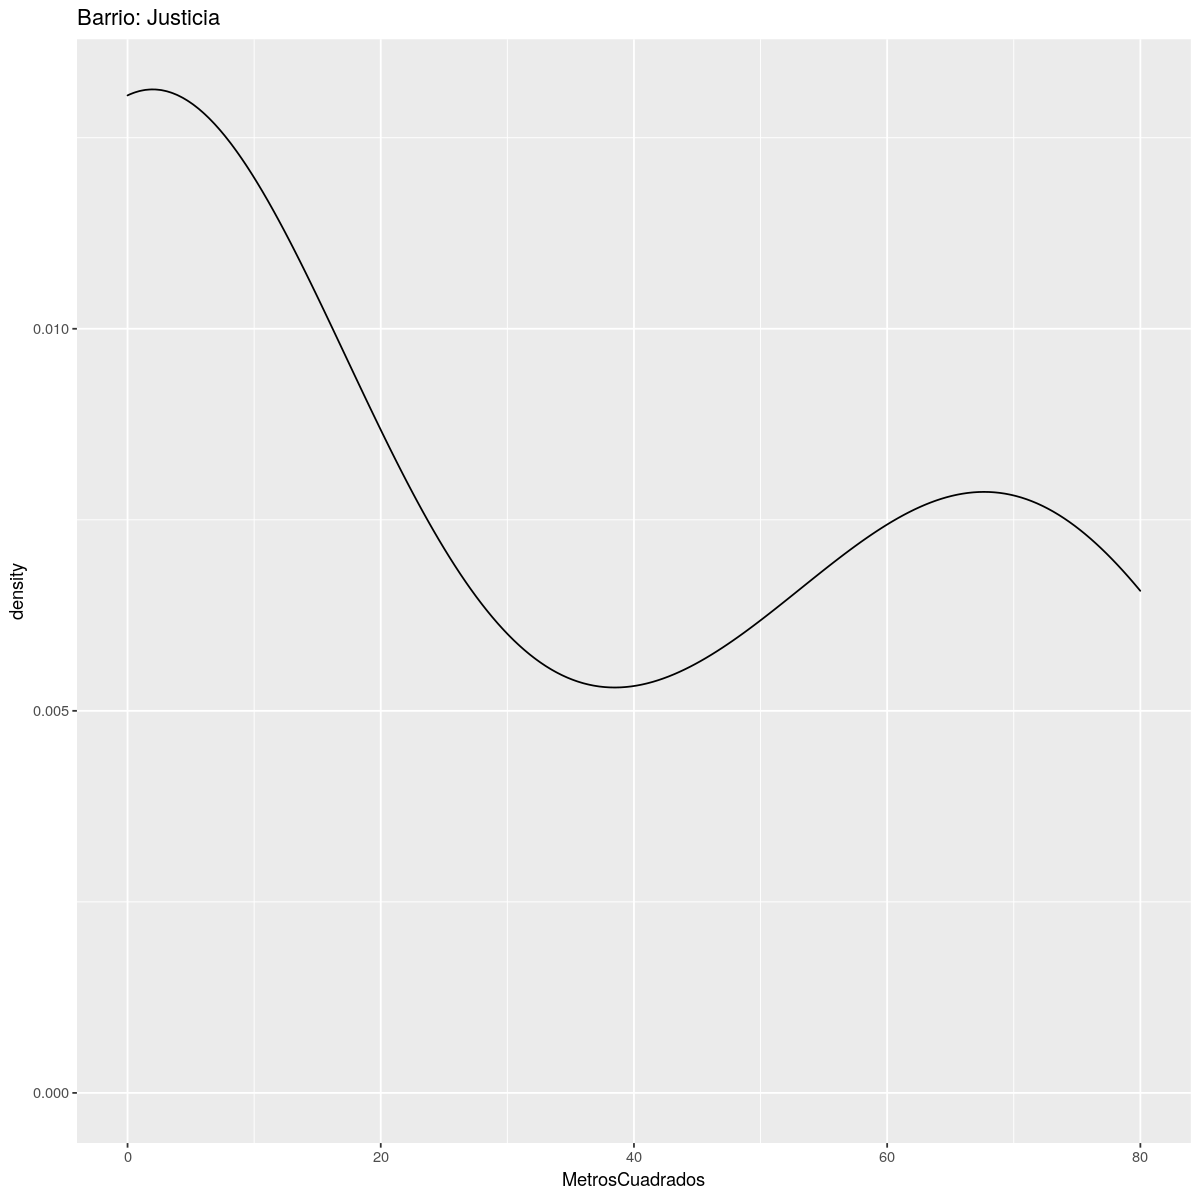

In [32]:

g1<-airbnb_entire[airbnb_entire$Barrio == "Recoletos",]
ggplot(data=g1, aes(x=MetrosCuadrados))+geom_density() + ggtitle ("Barrio: Recoletos")

g2<-airbnb_entire[airbnb_entire$Barrio == "Goya",]
ggplot(data=g2, aes(x=MetrosCuadrados))+geom_density()+ ggtitle ("Barrio: Goya")

g3<-airbnb_entire[airbnb_entire$Barrio == "Sol",]
ggplot(data=g3, aes(x=MetrosCuadrados))+geom_density()+ ggtitle ("Barrio: Sol")

g4<-airbnb_entire[airbnb_entire$Barrio == "Trafalgar",]
ggplot(data=g4, aes(x=MetrosCuadrados))+geom_density()+ ggtitle ("Barrio: Trafalgar")

g5<-airbnb_entire[airbnb_entire$Barrio == "Justicia",]
ggplot(data=g5, aes(x=MetrosCuadrados))+geom_density()+ ggtitle ("Barrio: Justicia")


Esta claro que las medias de metros cuadrados de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [33]:
#Comprobar si es distribucion gaussiana
recoletos<-airbnb_entire[airbnb_entire$Barrio == "Recoletos",]
shapiro.test(recoletos$MetrosCuadrados) 


	Shapiro-Wilk normality test

data:  recoletos$MetrosCuadrados
W = 0.75, p-value < 2.2e-16


In [34]:
sol<-airbnb_entire[airbnb_entire$Barrio == "Sol",]
shapiro.test(sol$MetrosCuadrados)  


	Shapiro-Wilk normality test

data:  sol$MetrosCuadrados
W = 0.83089, p-value = 8.691e-07


In [35]:
goya<-airbnb_entire[airbnb_entire$Barrio == "Goya",]
shapiro.test(goya$MetrosCuadrados)  ##p-value alto, no se considera distribucion  gaussiana (p-value >0.5)


	Shapiro-Wilk normality test

data:  goya$MetrosCuadrados
W = 0.93813, p-value = 0.5199


In [36]:
trafalgar<-airbnb_entire[airbnb_entire$Barrio == "Trafalgar",]
shapiro.test(trafalgar$MetrosCuadrados) 


	Shapiro-Wilk normality test

data:  trafalgar$MetrosCuadrados
W = 0.75023, p-value = 0.01276


In [37]:
justicia<-airbnb_entire[airbnb_entire$Barrio == "Justicia",]
shapiro.test(justicia$MetrosCuadrados)  


	Shapiro-Wilk normality test

data:  justicia$MetrosCuadrados
W = 0.76212, p-value = 0.0006419


In [38]:
justicia<-airbnb_entire[airbnb_entire$Barrio == "Justicia",]
shapiro.test(justicia$MetrosCuadrados)  


	Shapiro-Wilk normality test

data:  justicia$MetrosCuadrados
W = 0.76212, p-value = 0.0006419


In [39]:
#aplicamos test Kruskal-Wallis (por no ser distribucion gaussiana)
kruskal.test( Precio ~ MetrosCuadrados, data=airbnb_entire)
#el p-value (1.087e-07) es realmente bajo, por lo que podemos decir que si son estadísticamente diferentes.


	Kruskal-Wallis rank sum test

data:  Precio by MetrosCuadrados
Kruskal-Wallis chi-squared = 152.26, df = 72, p-value = 1.087e-07


Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [40]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")

Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [41]:
paste("Correlacion NumBanyos y NumDormitorios:",cor(barrio_sol$NumBanyos,barrio_sol$NumDormitorios))
paste("Correlacion MaxOcupantes y MetrosCuadrados:",cor(barrio_sol$MaxOcupantes,barrio_sol$MetrosCuadrados, use = "complete.obs"))
paste("Correlacion NumBanyos y MaxOcupantes:",cor(barrio_sol$NumBanyos,barrio_sol$MaxOcupantes))
paste("Correlacion NumDormitorios y MetrosCuadrados:",cor(barrio_sol$NumDormitorios,barrio_sol$MetrosCuadrados, use = "complete.obs"))
paste("Correlacion NumBanyos y MetrosCuadrados:",cor(barrio_sol$NumBanyos,barrio_sol$MetrosCuadrados, use = "complete.obs"))

[1] "Correlacion NumBanyos y NumDormitorios: 0.676190560725493"

[1] "Correlacion MaxOcupantes y MetrosCuadrados: 0.428623254666521"

[1] "Correlacion NumBanyos y MaxOcupantes: 0.657816206151622"

[1] "Correlacion NumDormitorios y MetrosCuadrados: 0.568452076445061"

[1] "Correlacion NumBanyos y MetrosCuadrados: 0.482054875848167"

Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


Warning message:
“Removed 641 rows containing non-finite values (stat_bin).”


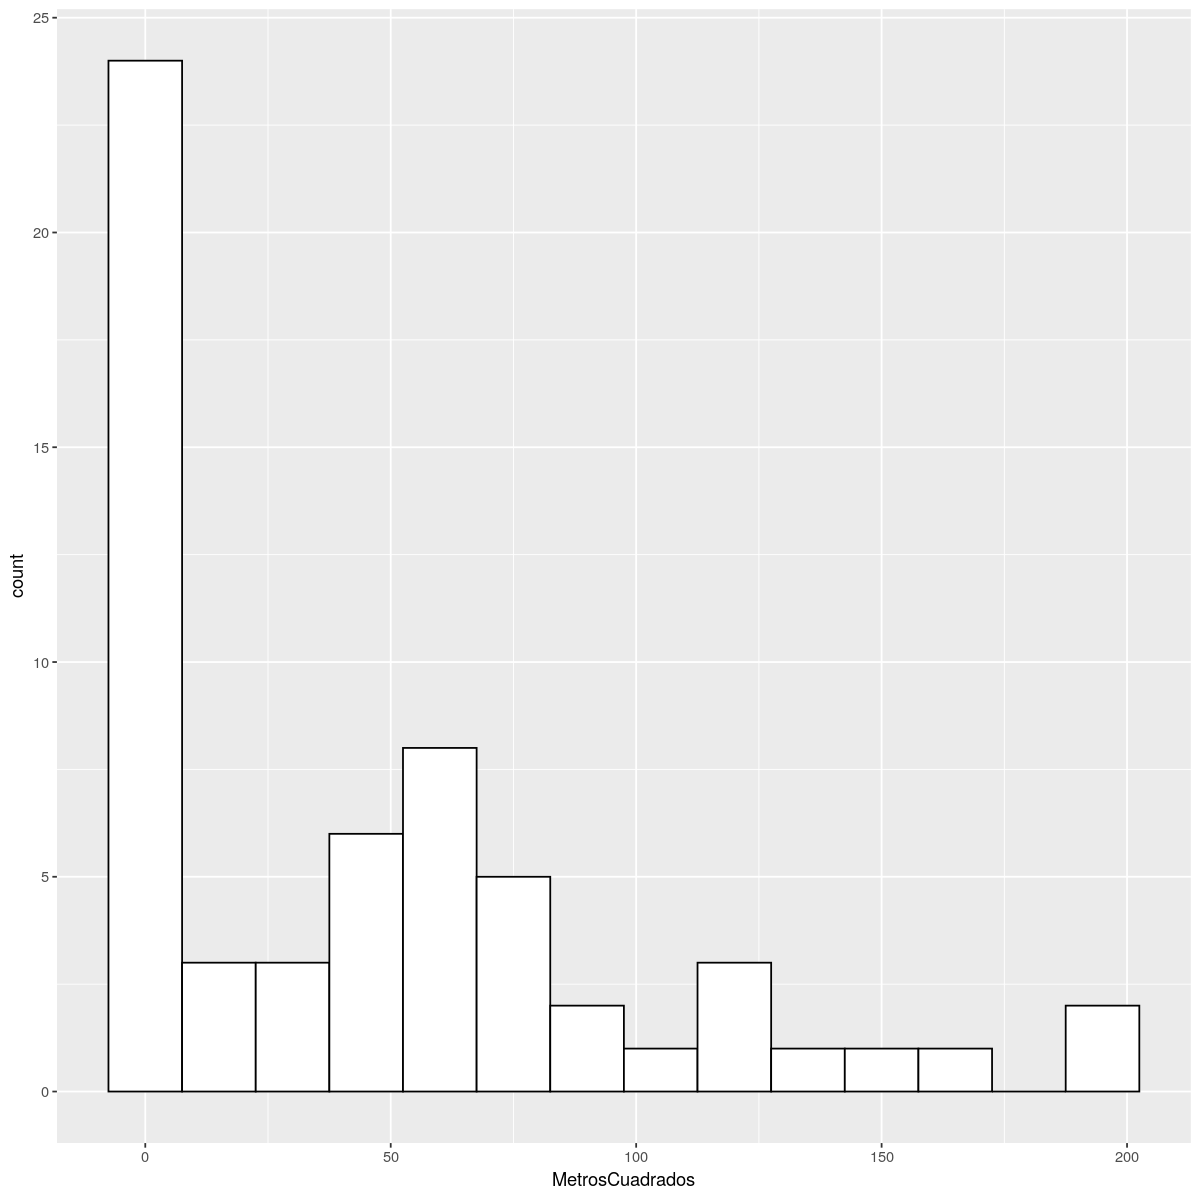

In [42]:
#no son de fiar, porque hay pisos de menos de 20 m²(no corresponden a pisos enteros)
ggplot(data=barrio_sol, aes(x=MetrosCuadrados)) +  geom_histogram(colour = 1, fill = "white",binwidth = 15) 

Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [43]:
barrio_sol<-barrio_sol[!is.na(barrio_sol$CodigoPostal),]

In [44]:
barrio_sol<-barrio_sol[barrio_sol$MetrosCuadrados>20,]

In [45]:
barrio_sol<-barrio_sol[!is.na(barrio_sol$CodigoPostal),]

¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [46]:
lm(Precio ~ NumDormitorios, data = barrio_sol) |> summary()  


Call:
lm(formula = Precio ~ NumDormitorios, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-96.132 -15.419  -4.091  17.852  54.868 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      43.205      8.452   5.112 1.70e-05 ***
NumDormitorios   40.385      3.998  10.101 3.62e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.71 on 30 degrees of freedom
Multiple R-squared:  0.7728,	Adjusted R-squared:  0.7652 
F-statistic:   102 on 1 and 30 DF,  p-value: 3.621e-11


In [47]:
lm(Precio ~ MetrosCuadrados, data = barrio_sol) |> summary()


Call:
lm(formula = Precio ~ MetrosCuadrados, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-68.587 -17.175  -0.573   9.882 118.046 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      28.7594    13.9789   2.057   0.0484 *  
MetrosCuadrados   1.0210     0.1521   6.711 1.95e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.41 on 30 degrees of freedom
Multiple R-squared:  0.6002,	Adjusted R-squared:  0.5869 
F-statistic: 45.04 on 1 and 30 DF,  p-value: 1.947e-07


In [48]:
#Es mas fiable la variable de NumDormitorios , porque el Pr es inferior al de MetrosCuadrados

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [49]:
regresion<-lm(Precio ~ MetrosCuadrados, data = barrio_sol)
confint(regresion, level = 0.95)


,2.5 %,97.5 %
(Intercept),0.2107062,57.308135
MetrosCuadrados,0.7103264,1.331749


Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [50]:
regresion2<-lm(Precio ~ NumDormitorios, data = barrio_sol)
confint(regresion2, level = 0.95)

,2.5 %,97.5 %
(Intercept),25.94394,60.46692
NumDormitorios,32.21985,48.55095


¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el intervalo de confianza de esa probabilidad?

In [54]:
apartamentos<-barrio_sol[barrio_sol$TipoPropieda == "Apartment",] 

table(apartamentos$NumDormitorios)          #2 apartamentos con 3 dormitorios
summary(table(apartamentos$NumDormitorios)) #total apartamentos 28


 0  1  2  3  4  5 
 2 14  7  2  2  1 

Number of cases in table: 28 
Number of factors: 1 

In [53]:
ns<-2
n<-28
binom.test(ns,n)
#Probabilidad : 0.07142857
#Intervalo de confianza: 0.008770497 - 0.235034773


	Exact binomial test

data:  ns and n
number of successes = 2, number of trials = 28, p-value = 3.032e-06
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.008770497 0.235034773
sample estimates:
probability of success 
            0.07142857 
